In [220]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import cpi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [108]:
cpi.update()

In [50]:
df = pd.read_pickle("df.pkl")  

In [51]:
df.head()

,storm_id,duration,name,damage,date,wind,pressure,lat,long,rainfall,category,year,month,elevation
0,AL011959,5.50,Arlene,500000.0,1959-05-30,55.0,993.000000,29.650000,-91.600000,15.26,0,1959,5,0.299893
1,AL021993,3.25,Arlene,22000000.0,1993-06-20,35.0,1001.166667,27.116667,-97.466667,15.26,0,1993,6,2.473105
2,AL011962,6.75,Alma,1000000.0,1962-08-28,65.0,990.666667,34.526417,-76.099667,10.38,0,1962,8,-39.299995
3,AL011966,9.00,Alma,10050000.0,1966-06-09,80.0,979.666667,29.909800,-84.498200,10.38,1,1966,6,-0.304802
4,AL011968,12.25,Abby,450000.0,1968-06-04,57.0,992.000000,26.808383,-82.166817,14.65,0,1968,6,0.206002


In [52]:
df.dtypes

storm_id      object
duration     float64
name          object
damage       float64
date          object
wind         float64
pressure     float64
lat          float64
long         float64
rainfall     float64
category       int64
year           int64
month          int64
elevation    float64
dtype: object

In [53]:
df.shape

(237, 14)

In [124]:
inflated_damage = []
for index, row in df.iterrows():
    if row['year'] > 1913:
        inflated_damage.append(cpi.inflate(row['damage'], row['year']))
    else:
        inflated_damage.append(cpi.inflate(row['damage'], 1913))

inflated_damage[0:5]

[4655841.924398625,
 41254948.09688582,
 8972516.55629139,
 84050879.62962964,
 3503922.4137931042]

In [125]:
df['damage'] = inflated_damage

### Converting damage to billions 

In [147]:
df['damage'] = df['damage']/1000000000

In [148]:
df.head()

,storm_id,duration,name,damage,date,wind,pressure,lat,long,rainfall,category,year,month,elevation
0,AL011959,5.50,Arlene,0.004656,1959-05-30,55.0,993.000000,29.650000,-91.600000,15.26,0,1959,5,0.299893
1,AL021993,3.25,Arlene,0.041255,1993-06-20,35.0,1001.166667,27.116667,-97.466667,15.26,0,1993,6,2.473105
2,AL011962,6.75,Alma,0.008973,1962-08-28,65.0,990.666667,34.526417,-76.099667,10.38,0,1962,8,-39.299995
3,AL011966,9.00,Alma,0.084051,1966-06-09,80.0,979.666667,29.909800,-84.498200,10.38,1,1966,6,-0.304802
4,AL011968,12.25,Abby,0.003504,1968-06-04,57.0,992.000000,26.808383,-82.166817,14.65,0,1968,6,0.206002


In [193]:
df.pressure.fillna(df.pressure.mean(), inplace = True)

# Discriptive Analysis

## Visualizations

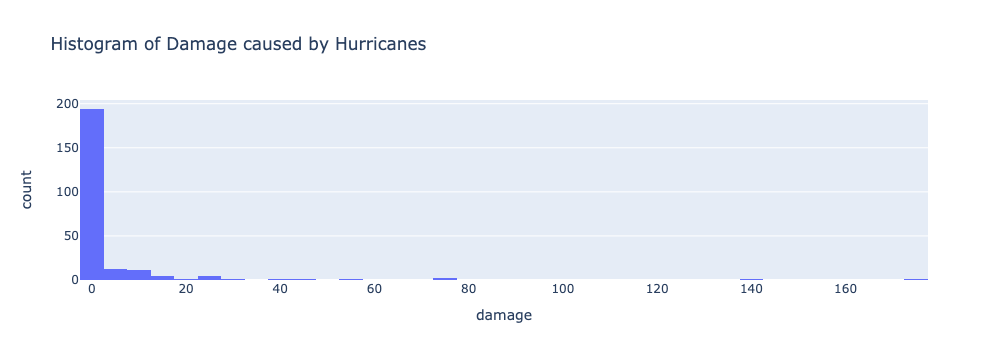

In [194]:
fig = px.histogram(df, x="damage", title = 'Histogram of Damage caused by Hurricanes')
fig.show()

#### Most hurricanes caused damage less than 5 Billon Dollars

In [195]:
df[df.damage > 100]

,storm_id,duration,name,damage,date,wind,pressure,lat,long,rainfall,category,year,month,elevation
131,AL092017,17.25,Harvey,138.182319,2017-08-26,115.0,946.166667,28.166667,-97.066667,60.58,3,2017,8,-2.100000
157,AL122005,7.50,Katrina,173.431900,2005-08-29,116.0,922.000000,29.384533,-89.602700,16.43,3,2005,8,0.670101


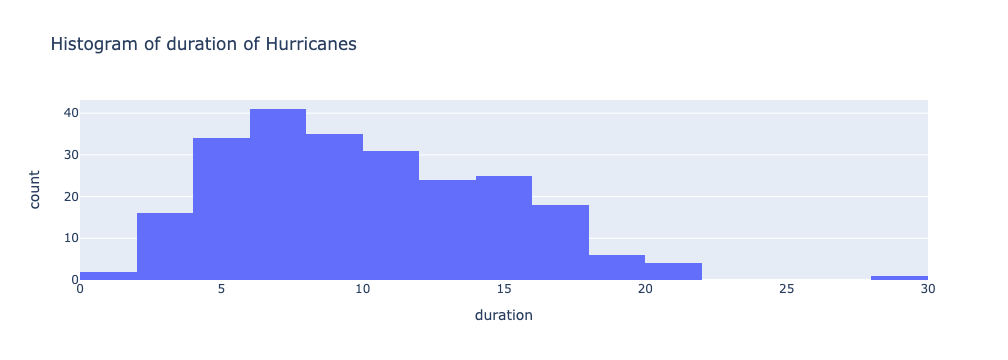

In [196]:
fig = px.histogram(df, x="duration", nbins = 20, title = 'Histogram of duration of Hurricanes')
fig.show()

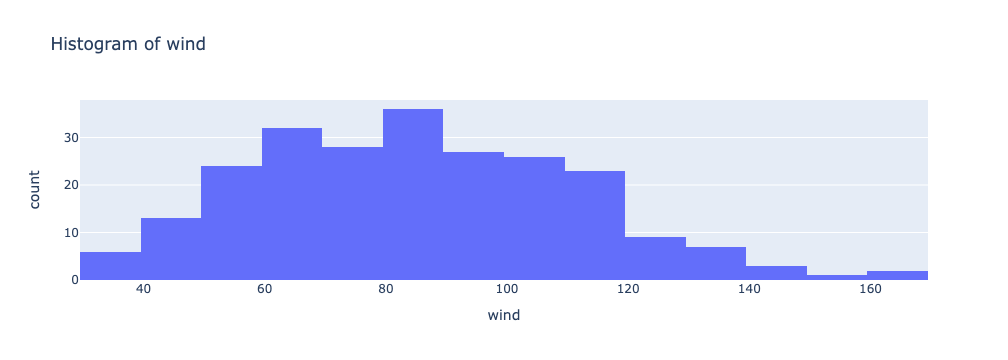

In [197]:
fig = px.histogram(df, x="wind", nbins = 20, title = 'Histogram of wind')
fig.show()

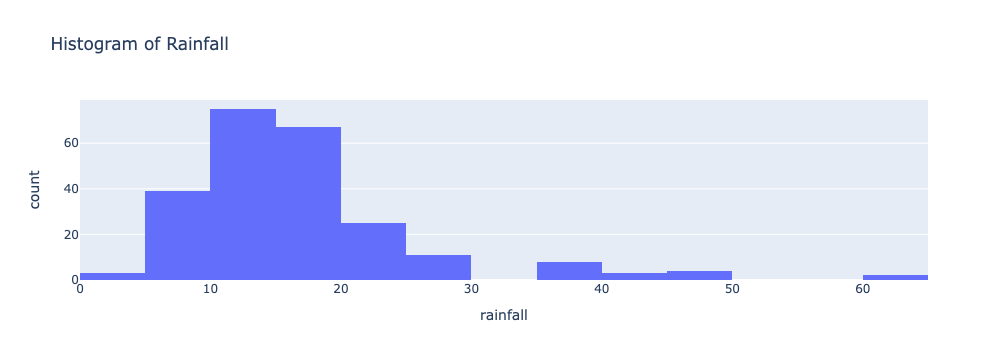

In [198]:
fig = px.histogram(df, x="rainfall", nbins = 20, title = 'Histogram of Rainfall')
fig.show()

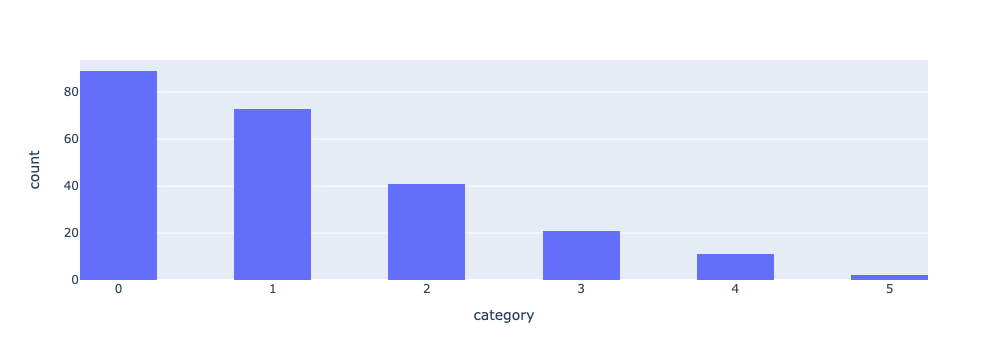

In [199]:
fig = px.histogram(df, x="category", nbins = 20)
fig.show()

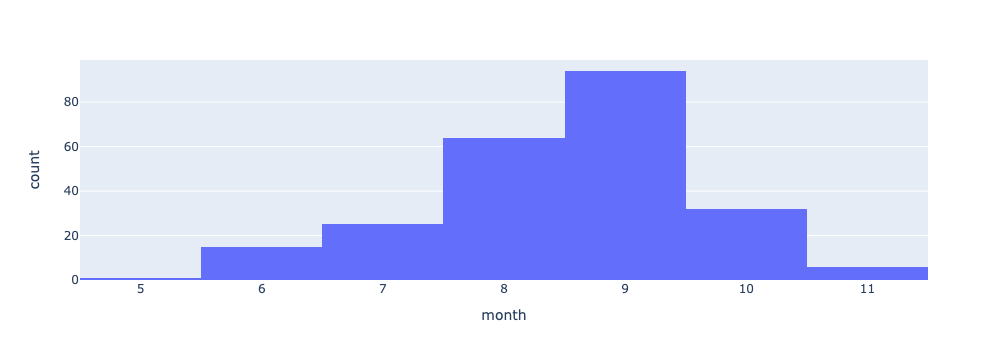

In [200]:
fig = px.histogram(df, x="month")
fig.show()

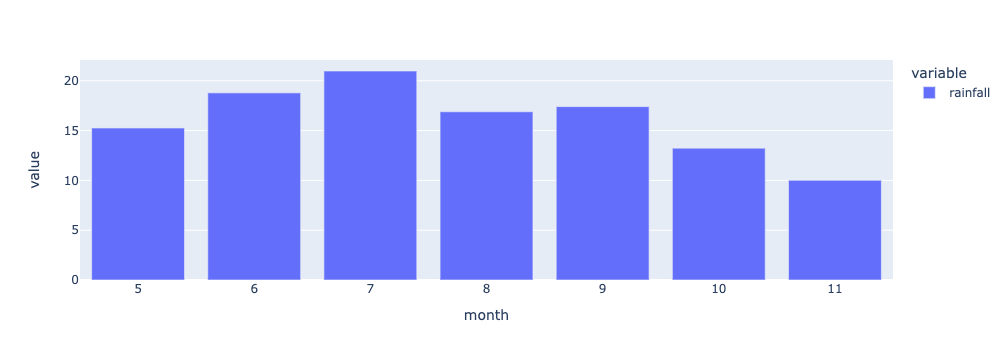

In [201]:
px.bar(df.groupby('month').rainfall.mean())

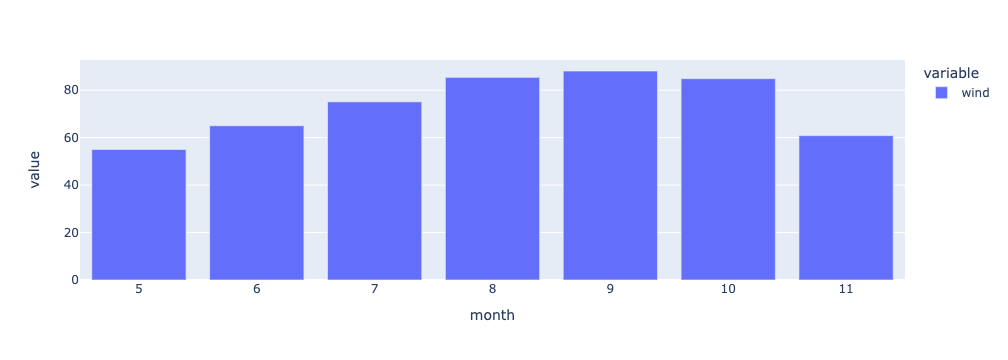

In [202]:
px.bar(df.groupby('month').wind.mean())

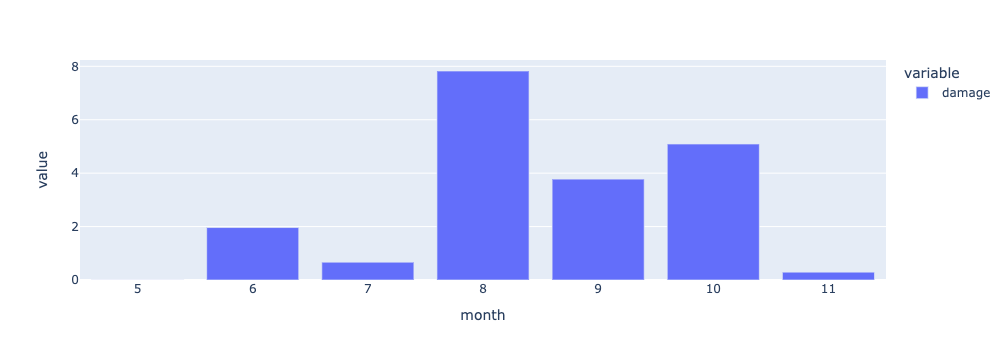

In [203]:
px.bar(df.groupby('month').damage.mean())

#### Hurricanes with most damage came in August, September and October

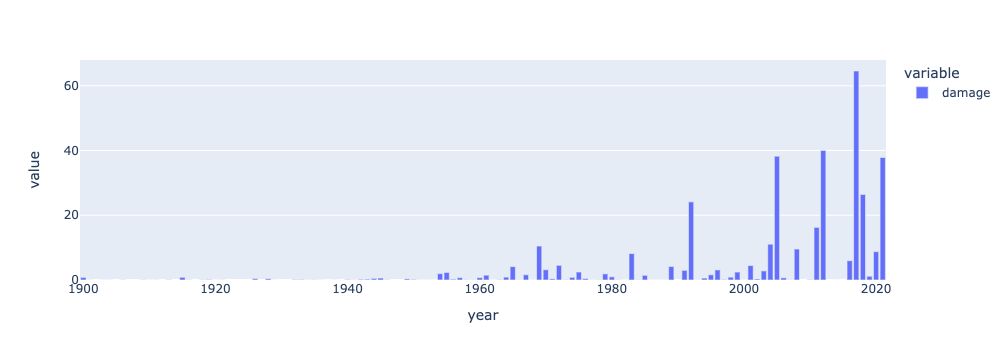

In [204]:
px.bar(df.groupby('year').damage.mean())

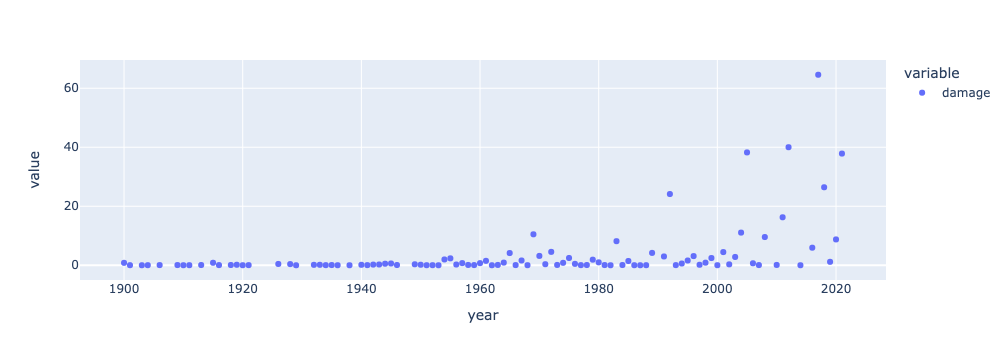

In [205]:
px.scatter(df.groupby('year').damage.mean())

### There seems an upward trend in damage caused by recent hurricanes.
### With time Hurricanes are causing more and more damage

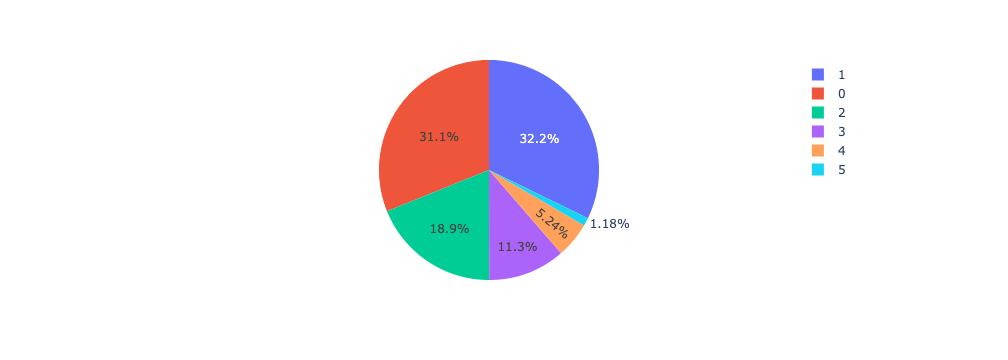

In [206]:
px.pie(df, values = 'duration', names = 'category')

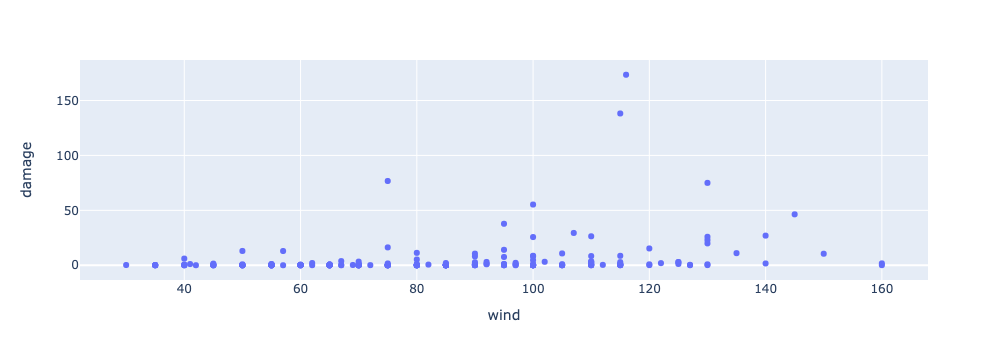

In [207]:
px.scatter(df, x = 'wind', y = 'damage')

## Correlation matrix

In [208]:
df.corr()

,duration,damage,wind,pressure,lat,long,rainfall,category,year,month,elevation
duration,1.000000,0.106091,0.319139,-0.350097,0.095879,0.064002,-0.000848,0.287631,-0.034679,0.245062,-0.043991
damage,0.106091,1.000000,0.251354,-0.334906,-0.037616,0.140198,0.181331,0.292208,0.272775,0.017128,0.065590
wind,0.319139,0.251354,1.000000,-0.927325,-0.190143,0.176831,-0.165434,0.942746,-0.213119,0.138827,-0.030196
pressure,-0.350097,-0.334906,-0.927325,1.000000,0.123540,-0.154897,0.160431,-0.878699,0.191422,-0.164169,0.043615
lat,0.095879,-0.037616,-0.190143,0.123540,1.000000,-0.049383,-0.110831,-0.251128,0.014821,-0.034646,0.167836
long,0.064002,0.140198,0.176831,-0.154897,-0.049383,1.000000,-0.044898,0.203214,0.297090,-0.022055,0.319667
rainfall,-0.000848,0.181331,-0.165434,0.160431,-0.110831,-0.044898,1.000000,-0.141709,0.309390,-0.193381,0.084393
category,0.287631,0.292208,0.942746,-0.878699,-0.251128,0.203214,-0.141709,1.000000,-0.192296,0.118606,-0.030267
year,-0.034679,0.272775,-0.213119,0.191422,0.014821,0.297090,0.309390,-0.192296,1.000000,-0.074298,0.074549
month,0.245062,0.017128,0.138827,-0.164169,-0.034646,-0.022055,-0.193381,0.118606,-0.074298,1.000000,-0.016742


<AxesSubplot:>

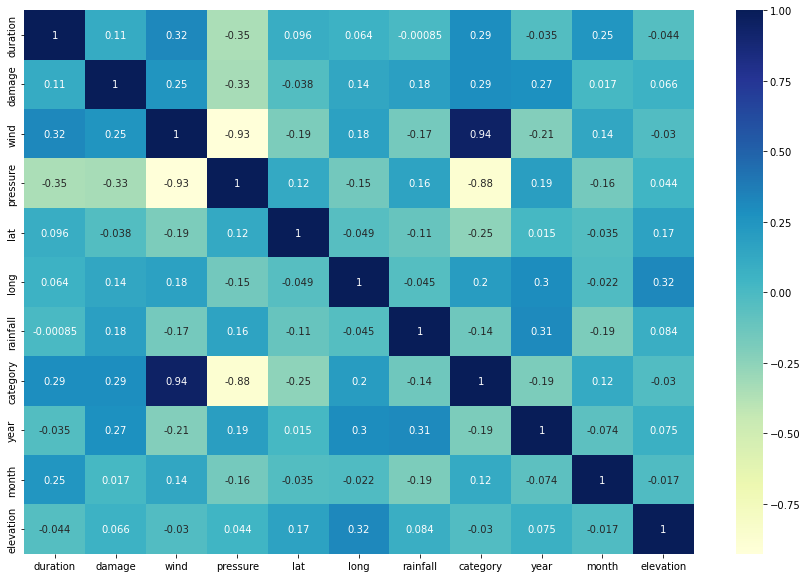

In [209]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#### Wind and pressure are highly negatively correlated
#### Wind and category are highly correlated which was expected

# Diagnostic Analytics

#### Most hurricanes caused damage less than 5 Billon Dollars
#### Most Hurricanes lasted from 4 to 10 days
#### There seems an upward trend in damage caused by recent hurricanes.
#### With time Hurricanes are causing more and more damage
#### Wind and pressure are highly negatively correlated
#### Wind and category are highly correlated which was expected
#### Hurricanes with most damage came in August, September and October

# Predictive Analytics

In [210]:
df.columns

Index(['storm_id', 'duration', 'name', 'damage', 'date', 'wind', 'pressure',
       'lat', 'long', 'rainfall', 'category', 'year', 'month', 'elevation'],
      dtype='object')

In [211]:
x = df[['duration', 'wind', 'pressure', 'lat', 'long', 'rainfall', 'category', 'year', 'month', 'elevation']]
y = df['damage']

### Scaling the data

In [212]:
scaler = StandardScaler()
x = pd.DataFrame(data=scaler.fit_transform(x), columns=x.columns)

In [213]:
x.head()

,duration,wind,pressure,lat,long,rainfall,category,year,month,elevation
0,-0.961930,-1.078795,1.007363,-0.077233,-0.380138,-0.190035,-0.958436,-0.399228,-3.052294,-0.021240
1,-1.442108,-1.842343,1.372821,-0.682621,-0.561944,-0.190035,-0.958436,0.674172,-2.179684,-0.018216
2,-0.695165,-0.697020,0.902947,1.088078,0.100212,-0.731981,-0.958436,-0.304516,-0.434464,-0.076358
3,-0.214988,-0.124359,0.410698,-0.015149,-0.160056,-0.731981,-0.123328,-0.178234,-2.179684,-0.022082
4,0.478601,-1.002440,0.962613,-0.756291,-0.087807,-0.257778,-0.958436,-0.115093,-2.179684,-0.021371


#### Train Test Split

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [217]:
lm = LinearRegression()
lm = lm.fit(x_train, y_train)

In [218]:
train_pred = lm.predict(x_train)
test_pred = lm.predict(x_test)

In [221]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 15.781150441548641
Testing Root Mean Squared Error: 7.03989711129021


In [222]:
lm.coef_

array([ -0.62631122, -14.04978881, -13.30795603,   0.92646113,
        -0.48611228,   2.86700824,   8.66496303,   5.60431414,
         0.71883378,   0.60665043])

# Prescriptive Analysis